In [1]:
import pandas as pd
karachi_df = pd.read_csv("solar data/solar-measurementspakistankarachiwb-esmapqc.csv", low_memory = False)
bahawalpur_df = pd.read_csv("solar data/solar-measurementspakistanbahawalpurwb-esmapqc.csv", low_memory = False)
multan_df = pd.read_csv("solar data/solar-measurementspakistanmultanwb-esmapqc.csv", low_memory = False)
lahore_df = pd.read_csv("solar data/solar-measurementspakistanlahorewb-esmapqc.csv", low_memory = False)
peshawar_df = pd.read_csv("solar data/solar-measurementspakistanpeshawarwb-esmapqc.csv", low_memory = False)
khuzdar_df = pd.read_csv("solar data/solar-measurementspakistankhuzdarwb-esmapqc.csv", low_memory = False)
islamabad_df = pd.read_csv("solar data/solar-measurementspakistanislamabadwb-esmapqc.csv", low_memory = False)
hyderabad_df = pd.read_csv("solar data/solar-measurementspakistanhyderabadwb-esmapqc.csv", low_memory = False)
bahawalpur_df = pd.read_csv("solar data/solar-measurementspakistanbahawalpurwb-esmapqc.csv", low_memory = False)

In [2]:
combined_dataset = pd.concat([karachi_df,
                             bahawalpur_df,
                             multan_df,
                             lahore_df,
                             peshawar_df,
                             khuzdar_df,
                             islamabad_df,
                             hyderabad_df,
                             bahawalpur_df])

In [3]:
extracted = combined_dataset[['air_temperature', 'relative_humidity', 'wind_speed']]

In [4]:
extracted.count()

air_temperature      1049001
relative_humidity    1049001
wind_speed           1049001
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(extracted)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_init=10,max_iter=300,random_state=42)
kmeans.fit_transform(scaled_features)

array([[2.73576445, 3.64968893, 4.72508021, ..., 3.68760215, 2.37587644,
        1.3604168 ],
       [2.41078977, 3.57811767, 4.55315383, ..., 3.72494234, 2.48115258,
        1.72234506],
       [2.49243112, 3.65762508, 4.6075735 , ..., 3.76574771, 2.49179403,
        1.77441737],
       ...,
       [1.97636276, 2.12827338, 3.03501345, ..., 1.72118905, 0.74419173,
        1.15486241],
       [1.96167881, 2.07552237, 2.97984041, ..., 1.65944706, 0.73948959,
        1.19514692],
       [1.96167881, 2.07552237, 2.97984041, ..., 1.65944706, 0.73948959,
        1.19514692]])

# Check for the inertia of different clusters 

In [8]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot for the inetia value to estimate the best cluster value

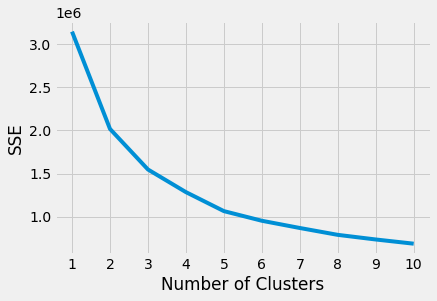

In [9]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Here is the count of the cluster using knee cluster

In [11]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

print("Total Clusters:", kl.elbow)

Total Clusters: 3


In [15]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

KeyboardInterrupt: 

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

[2 2 2 ... 0 0 0]


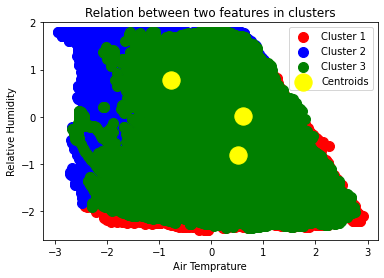

In [17]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_features)
print(y_kmeans)

# Visualising the clusters
plt.scatter(scaled_features[y_kmeans == 0, 0], scaled_features[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_features[y_kmeans == 1, 0], scaled_features[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_features[y_kmeans == 2, 0], scaled_features[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Relation between two features in clusters')
plt.xlabel('Air Temprature')
plt.ylabel('Relative Humidity')
plt.legend()
plt.show()